# Neural Network

Neural networks have the ability to pick up patterns and trends in complex data. Rather than making assumptions before fitting, this model has an adaptive learning feature that learns how to do tasks based on the data at the initial start. It should score higher in general due to its backpropagation ability that is the powerhouse of learning for this model. Our neural network model had a higher accuracy score on the train data compared to logistic regression (63%), but had about the same test accuracy score (56%). 

I used Keras for making the neural network, and also utilized early stopping as a regularization method in order to optimize the accuracy score. Based on how early it stopped (3 out of 10 epochs), we can say that the score can only be optimized to a small degree.

## Importing python libraries and dataframes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = pd.read_csv('../Data/X_train.csv', index_col=0)
y_train = pd.read_csv('../Data/y_train.csv', index_col=0)
X_test = pd.read_csv('../Data/X_test.csv', index_col=0)
y_test = pd.read_csv('../Data/y_test.csv', index_col=0)

## Scaling the data

In [3]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Modeling

In [4]:
model = Sequential()

n_input = X_train_sc.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim = n_input, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto')

callbacks_list = [early_stop]

I used a relu activation function for the hidden layer, and a sigmoid function for the output layer. I also implemented early stopping to increase my accuracy score.

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

I used a binary cross entropy loss function because we are predicting on a binary output. I also implemented gradient descent for this model by utilizing an adam optimizer. Because we are looking for scores based on accuracy, that is the metric we should be setting.

In [6]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), 
                        epochs=10, batch_size=717,
                        callbacks = callbacks_list)

Train on 3468735 samples, validate on 2403344 samples
Epoch 1/10
3468735/3468735 [==============================] - 11s 3us/step - loss: 0.6621 - acc: 0.6036 - val_loss: 0.7880 - val_acc: 0.3900
Epoch 2/10
3468735/3468735 [==============================] - 11s 3us/step - loss: 0.6416 - acc: 0.6309 - val_loss: 0.7198 - val_acc: 0.5118
Epoch 3/10
3468735/3468735 [==============================] - 12s 3us/step - loss: 0.6276 - acc: 0.6438 - val_loss: 0.7636 - val_acc: 0.4638
Epoch 00003: early stopping


We can see that early stopping capped the best possible score at 3 out of 10 epochs.

## Plotting loss

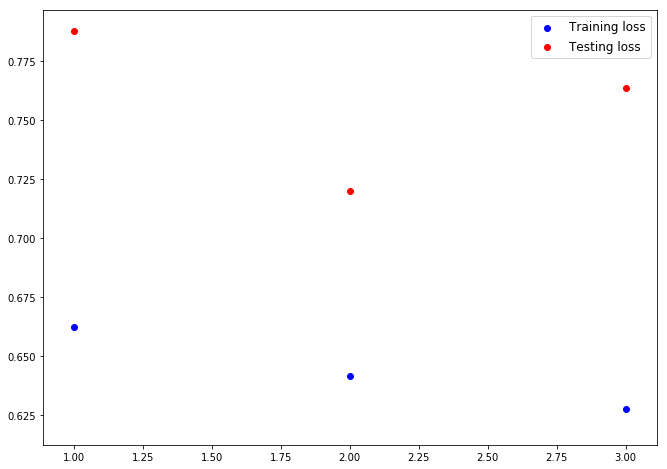

In [10]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

fig, ax = plt.subplots(figsize = (11, 8))
plt.scatter(range(1,4), train_loss, c = 'b', label='Training loss')
plt.scatter(range(1,4), test_loss, c = 'r', label='Testing loss')
plt.legend(fontsize = 12);

X represents number of epochs while Y represents accuracy score values. We can see that the testing loss (red data points) is going up, while the training loss (blue points) is going down. What this demonstrates is that there is overfitting in our model (higher train score). 

In [11]:
history.history['acc'][-1], history.history['val_acc'][-1]

(0.6437715766678879, 0.4638029348187055)

We can see definite evidence of overfitting based on these accuracy scores. What they tell us is that our model can accurately predict 64% of all crime occurrences in 2016. However, for the crime instances for 2017, the model was able to accurately predict only 46% of all instances.

## Putting predictions into confusion matrix

We need to set a threshold so that the prediction outputs are in binary form. I choose .5 as the threshold so that the predictions can be equally balanced.

In [12]:
nn_predictions = model.predict(X_test_sc)
threshold = .5
class_preds = nn_predictions > threshold

In [13]:
nn_cm = confusion_matrix(y_test, class_preds)
nn_cm

array([[1058692, 1256665],
       [  32001,   55986]])

In [14]:
nn_cm_df = pd.DataFrame(nn_cm, columns=['predicted no crime', 'predicted crime'], index=['actual no crime', 'actual crime'])
nn_cm_df

,predicted no crime,predicted crime
actual no crime,1058692,1256665
actual crime,32001,55986


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, class_preds).ravel() 
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1058692
False Positives: 1256665
False Negatives: 32001
True Positives: 55986


In [22]:
print(classification_report(y_test, class_preds, target_names=['No Crime', 'Crime']))

              precision    recall  f1-score   support

    No Crime       0.97      0.46      0.62   2315357
       Crime       0.04      0.64      0.08     87987

   micro avg       0.46      0.46      0.46   2403344
   macro avg       0.51      0.55      0.35   2403344
weighted avg       0.94      0.46      0.60   2403344



Neural network performed about the same as the other models in predicting whether a crime occurred in Chicago in 2017. We have a high number of false positives, and low false negatives. This means that we have optimized for higher sensitivity rather than specificity. When it came to predicting positive crime occurrences, it accurately predicted a little more than half of all true crime occurences (64%).